# Plotting Data:
Plotting data is one of the most important and practical advantages to coding. It is important to learn different ways to plot and learn about all the features that are available and how to use said features

## Matplot:

Matplot is a simple graphing package for Python, that is great for making simple graphs.
In this tutorial we will go over basic bar- and line-graphs with a few features.

Before we begin we want to specify inline so we will embed a picture into our notebook so we have an embedded visualization result image in our notebook.

In [1]:
%matplotlib inline

Matplotlib, like numpy, tries to help support matlab users transition into using python by providing a library that supports matlab
like constructs in python. For Matplotlib this is done in the matplotlib.pyplot library. The pyplot library is used extensively
throughout many matplotlib programs and will be the main library you will work in with matplotlib.

Let's import the matplotlib.pyplot and explore some of its features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### First success with a bar graph

We begin with a pandas DataFrame with some data to show on a bar graph, an idiom you can often use.
`plt.bar()` returns a value and also shows the plot.
The `noprint = ...` part is here to suppress the returned value.

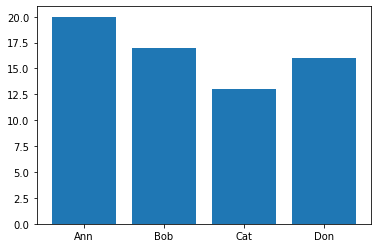

In [3]:
creds = pd.DataFrame({'Ann': [20], 'Bob': [17], 'Cat': [13], 'Don': [16]})
creds
noprint = plt.bar(height=np.array(creds.iloc[0]), x=creds.columns)

## `matplotlib` terminology

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--1x1epD95--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/b9psb0mtz7yk8qmfe26f.png" width="600px"/>

### Figures and Axes

This diagram, a subset of the diagram above, shows the relationships between figures and axes:

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--dNi3F76s--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/rr39m52m6peef1drke7m.png" width="300px"/>

Figures are the main container of matplotlib visualization. These objects contains 1 or more axes that store each specific visualization you wish to show (histogram, bar graph, line graph, etc.). At its core matplotlib uses figures and axes to show all of its visualization tasks.

Execute the following example to show how figures and axes work.

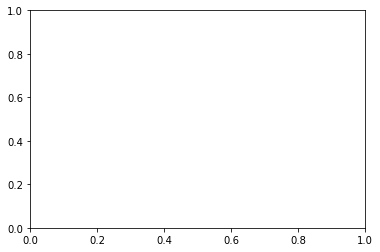

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

Now lets see by what we mean by multiple axes in the same figure. You don't need to understand what add_subplot does other then it adds a new axes to the same figure

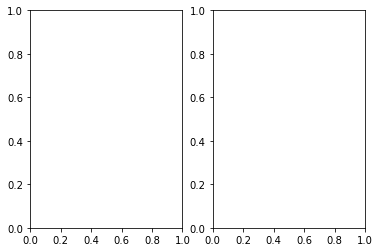

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

From the cell above we see a figure with an empty axes. A key part of matplotlib will be calling functions on axes to fill them with visualizations we want to see. However it is a pain to create figures and axes only then to perform the interesting visualization on the axes. To make it faster we use plt directly.

Instead of having to create figures and axes we can call plotting functions directly in plt and they can automatically create figures and axes and build the visualization in the figures for you without having to create figures and axes. While convenient this reduces the flexibility over explicitly creating figures and axes, but for the most part it will not matter too much.

To show what we mean we will create a histogram in the axes to show the difference between explicitly working with axes and using plt directly.

In [6]:
x = [0,0,0, 1, 1, 1,1, 1, 2, 2]

##### Explicity creating axes

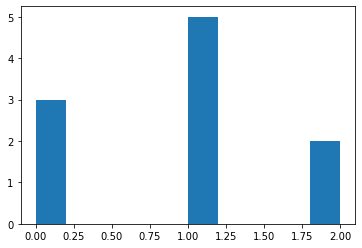

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
noprint = ax.hist(x, 10)

##### Directly calling plt

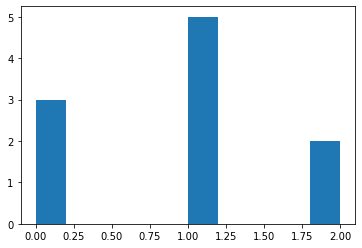

In [8]:
noprint = plt.hist(x, 10)

We can see how much shorter the code is to write directly using plt.

Now we can finally introduce what are some of the plotting functionality that we can introduce into our axes.

### Histograms:

Histograms takes a sequence of some information (numbers, strings, etc.), count how many occurrences of each unique entry are in the sequence and plot bars for each unique entry and how frequently they occur.

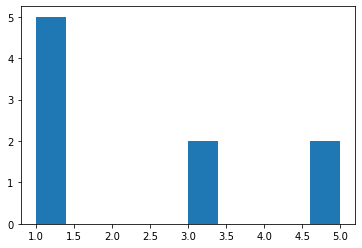

In [9]:
data = [1, 3, 5, 5, 3, 1, 1, 1, 1]
noprint = plt.hist(data)

We can see that they plot bars at x position 1, 3, and 5 since those are the 3 unique values in our sequence.

Histograms are not limited to numeric information.

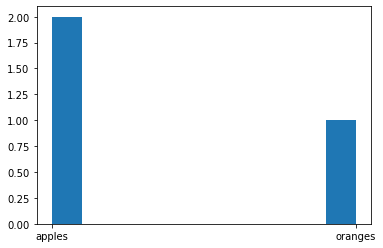

In [10]:
data = ["apples", "apples", "oranges"]
noprint = plt.hist(data)

They even work with mixed data!

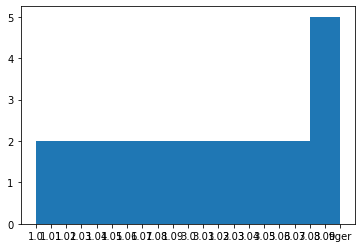

In [11]:
shift = np.array(list(range(10)))/100.0

x1 = np.array([1 for i in range(10)]) + shift
x3 = np.array([3 for i in range(10)]) + shift

animals = np.array(["tiger", "tiger", "tiger"])

data = np.concatenate([x1, x3, animals])

counts, bins, patches = plt.hist(data)

# This creates a mess and it is instructive to uncomment the following lines and examine the intermediate results
# print(x1)
# print(x3)
# print(counts)
# print(bins)
# for p in patches:
#     print(p)

We can see in counts that we split the data evenly with 2 entries each in 9 bins and 5 in the last bin. Additionally from bins we see each bar groups entries within a range of 2 (strange that "tiger" has a numeric value to fit in one of the bins).

This little detour was to give a deeper understanding that matplotlib plotting functions have return values that can 
help you to inspect how the data was plotted. However in general it is outside the scope of the course and we will only be showing it for the histogram as an example, if you want to learn more on your own you should explore the matplotlib api.

## Jupyter is visual, Python is not

If you ever use matplotlib in python outside of Jupyter and you ran any of the earlier code in python alone you will see no plots. This is because jupyter automatically shows the plot on screen when it finishes running the cell. In python it just draws the data on the object but will not display it unless you explicitly tell it to.

In python you use "plt.show()" to show all the figures. (and jupyter implicity calls plt.show() onto the screen after the cell is done running)

###### Why 10 bins

Histogram defaults to 10 bins but we can change that via the bin paramter in plt.hist

First using the default bins, we get only 10 bars (2 entries per bar) despite there being far more than 10 entries

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


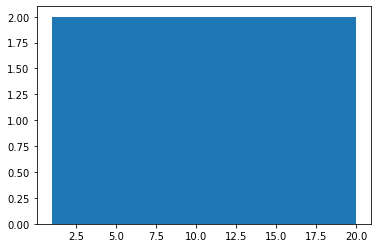

In [12]:
x = [i+1 for i in range(0,20)]
print(x)
noprint = plt.hist(x)

Now changing the bins parameter to 20 we get 20 bars so we see 1 entry in each bar, but the end result looks the same! 
To get some separation between the bars, change the number of bins in the cell below to 40. Explain the gap between the sets of bars.

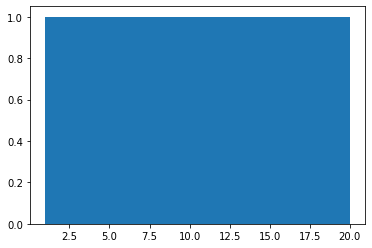

In [13]:
noprint = plt.hist(x, bins=20)

###### Multiple plots

One way to show multiple histograms overlaid is sending multidimensional data. `plt.hist` supports 2-D matrices as well as arrays for its data input. Given multiple dimensions it will overlay a separate histogram for each row in the 2-D matrix onto the same histogram plot.

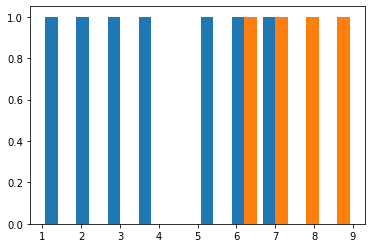

In [14]:
x1 = list([1,2,3,4,5,6,7]) # Not sure why but treating x1 and x2 as ndarrays seems to trigger a warning, so J forced them to be lists!
x2 = list([6,7,8,9])       # See https://gitlab.com/ase/ase/-/issues/675 for deeper research

noprint = plt.hist([x1,x2])

We see each plot is marked in a different color to differentiate it.
`matplotlib` has facilities to let you alter the color of the bars; we won't be covering them.

Lets see an interesting example, we have this picture of a square which contains the lightness value of each pixel from (0-255). Our image is arranged as a 2-D matrix with lightness value at each cell corresponding to that pixel. In our image every pixel is either 0 or 255. We want to create a histogram of the lightness of each pixel in our image.

First lets create and show the image

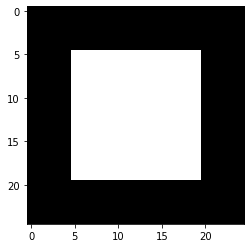

In [15]:
img = np.zeros((25,25))
img[5:-5, 5:-5] = 255

noprint = plt.imshow(img, cmap='gray')

Now lets use our histogram function on it to get all the pixel intensity values

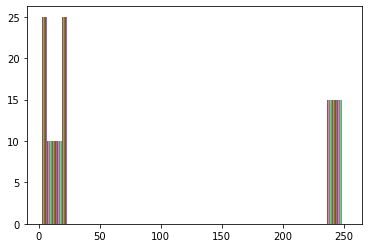

In [16]:
noprint = plt.hist(img)

It seems to created a bunch of colors in our plot. This is because our image is 2-D so histogram found a histogram for each row of the image and created a separate color for each. So we need to flatten our image before we pass to the histogram to see it.

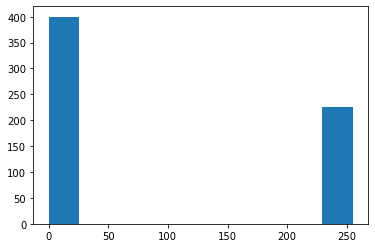

In [17]:
noprint = plt.hist(img.flatten())

### Line Plots

We use line plots to plot an ordered sequence of points and plots them on a plot and then connect lines between each consecutive pairs of points in the plot. 

we use plt.plot to create line plots and specify 1 array of x coordinates and 1 array of y coordinates

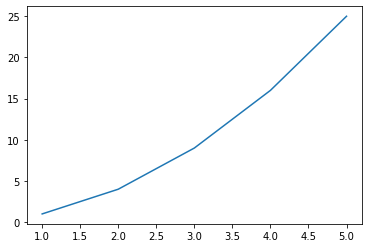

In [18]:
x1 = np.array([1,2,3,4,5])
y1 = x1**2

noprint = plt.plot(x1,y1)

So we can see at a line connecting each pair of consecutive x,y points in our plot of the function \\((y = x^2 \\)). What does it mean by ordered set of points? What if we change up the order?

[16 25  1  9  4]


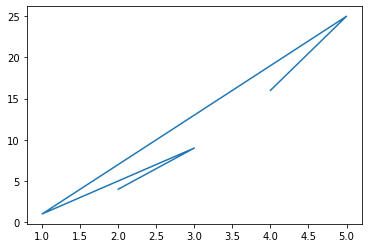

In [19]:
import random
x2 = x1.copy()
random.shuffle(x2)
y2 = x2**2
print(y2)

plt.plot(x2,y2)

The x or y positions don't really matter. What matters is the order that they are given to function and this effects how the plot can be created.

To handle multiple plots we can send in 2D matricies for the x coord and y coord. Instead of a separate data in each row of the matrix we need to specify **separate data along each column**.

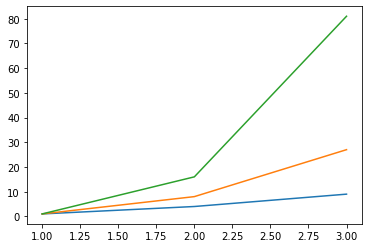

In [20]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

x = np.array([x1,x2,x3]).T # columns of x1, x2, x3

y1 = x1**2
y2 = x2**3
y3 = x3**4

y = np.array([y1,y2,y3]).T # columns of y1,y2,y3

noprint = plt.plot(x,y)

Plots can also be given different styles or line type to each line. This is provided by the linestyle parameter. 

Linestyle values can specify from among several possible values as follows:


| short hand | full name |
-------------|------------
|   -     |   solid      |
|   --    |   dashed     |
|   -.    |   dashdot    |
|   :     |   dotted     |

We can use either column as the value for a different style, we can show it as follows

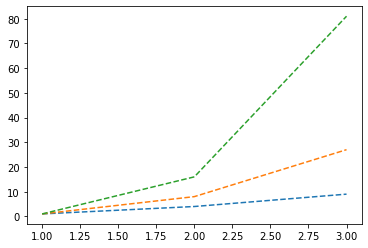

In [21]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

x = np.array([x1,x2,x3]).T # columns of x1, x2, x3

y1 = x1**2
y2 = x2**3
y3 = x3**4

y = np.array([y1,y2,y3]).T # columns of y1,y2,y3

noprint = plt.plot(x,y, linestyle="--")

We can also combine color and style togthor into a short string parameter that specifies both. We take the 1 letter color representation as the first character join the character(s). See the example.

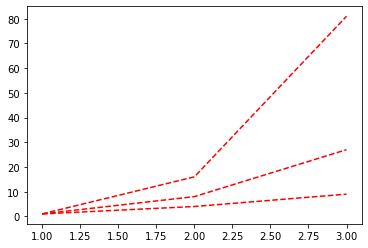

In [22]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4

noprint = plt.plot(x,y, "r--")

Up until now we have been passing multi-dimensional data to draw multiple data sets on the same plot by drawing all of them at once using a single plot function. However we can actually stack multiple plot functions togethor. We achieve this by successively calling plotting functions on the same axes.

In our case we successively call using plt method directly so the hidden axes will get successively drawn over to show multiple plots at once.

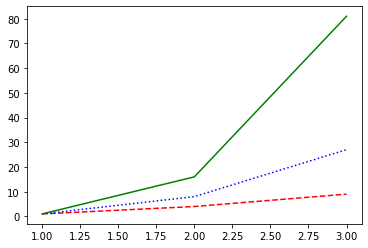

In [23]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4


plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
noprint = plt.plot(x3,y3, "g-")

#### Legends

Using multiple plots it can be difficult for reader to differentiate so we can create a key or legend to specify each plot.

We first need to name each plot and we can give each plot a parameter "label" that specifies a string name for that plot, this name will appear in the legend. Then we can use the plt.legend() to create our legend on the plot

Text(0, 0.5, 'Y LABEL HERE')

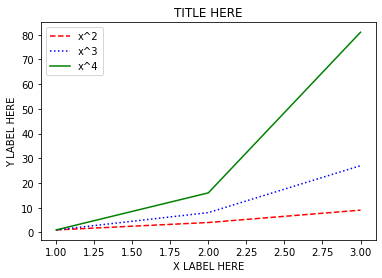

In [24]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4

plt.plot(x1,y1, "r--", label='x^2')
plt.plot(x2,y2, "b:", label='x^3')
plt.plot(x3,y3, "g-", label='x^4')

plt.axis('tight')
plt.legend()

plt.title("TITLE HERE")
plt.xlabel("X LABEL HERE")
plt.ylabel("Y LABEL HERE")



#### Universality of methods

One very cool thing about matplotlib is many of these methods can be applied to other plotting functions and additionally all plt functions can also be used via the axes method and called by axes as well.

However all plots will try to share the same axis so it may cause some problems if the plots are not related but often in its use it is good to show them when they are related

As a cool example we can show a line plot on an image plot axes

done


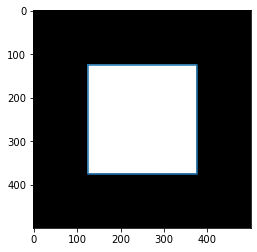

In [25]:
img = np.zeros((500, 500))
img[125:-125, 125:-125] = 255

x = [125, 375, 375, 125, 125]
y = [125, 125, 375, 375, 125]

plt.imshow(img, cmap='gray')
plt.plot(x,y)
print("done")

# When you're done, submit the notebook

1. **Run all the cells in order.**

2. Submit the notebook by saving it as PDF. 
    * In the cluster environment, it's File | Print (Save as PDF) and submit to [Gradescope](https://www.gradescope.com/courses/182658)<sup>&dagger;</sup>, 
    * On other versions, it may be File | Download As (PDF) and then submit to [Gradescope](https://www.gradescope.com/courses/182658)<sup>&dagger;</sup>.

<sup>&dagger;</sup>To submit to Gradescope, log into the website, add course 9W7PW3 (if not already added) and submit. The assignment name should match the name of this notebook.

![The end](https://live.staticflickr.com/32/89187454_3ae6aded89_b.jpg)